In [16]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, f1_score, accuracy_score
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [17]:
#wine quality data set
data = pd.read_csv('winequality-white.csv',sep=';',quotechar='"')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0

In [19]:
data['tasty'] = data['quality'].apply(isTasty)

In [20]:
data['tasty'].value_counts()

0    3838
1    1060
Name: tasty, dtype: int64

In [21]:
feature = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = data['tasty']

In [22]:
feature.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [23]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: tasty, dtype: int64

In [24]:
X=feature.values
Y=target.values
np.reshape(Y,(1,-1))

array([[0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [25]:
# Split data into train and  test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print ("Training set in wine quality classification model has {} samples.".format(X_train.shape[0]))
print ("Testing set in wine quality classification model has {} samples.".format(X_test.shape[0]))

Training set in wine quality classification model has 3673 samples.
Testing set in wine quality classification model has 1225 samples.


In [26]:
# Decision Tree
import timeit
import time
# Baseline (no pruning)

start_time = timeit.default_timer()

decisiontree0 = DecisionTreeClassifier(random_state=0)
decisiontree0.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer() 

Y_pred0 = decisiontree0.predict(X_test)
end_time = timeit.default_timer()
pred_time = end_time - start_time

acctrain_decisiontree0 = round(decisiontree0.score(X_train, y_train), 6)

print('Accuracy score (train set, baseline - unpruned, no cross validation):', acctrain_decisiontree0)
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  

Accuracy score (train set, baseline - unpruned, no cross validation): 1.0
Model Training Time (s):   0.03334
Model Prediction Time (s): 0.00074



In [12]:
acctest_decisiontree0 = round(accuracy_score(Y_pred0, y_test), 3)
print('Accuracy score (test set, baseline - unpruned):', acctest_decisiontree0)
auc_decisiontree0 = round(roc_auc_score(Y_pred0, y_test),3)
print('Accuracy score (test set, baseline - unpruned):', auc_decisiontree0)

Accuracy score (test set, baseline - unpruned): 0.823
Accuracy score (test set, baseline - unpruned): 0.737


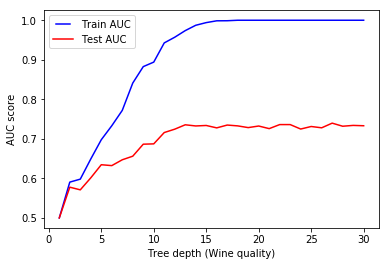

In [18]:
# Decision Tree Parameter Tuning - max depth:
max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt= DecisionTreeClassifier( max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth (Wine quality)')
plt.show()

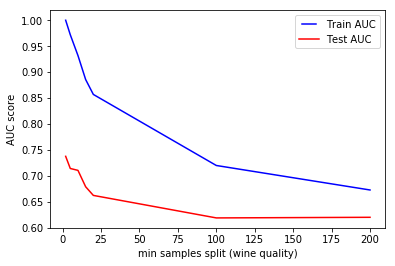

In [19]:
# chart does not report in the final report.
#min_samples_splits = np.linspace(0.0001,1,40, endpoint=True)
min_samples_splits = (2,5,10,15,20,100,200)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split (wine quality)')

plt.show()


In [20]:
# Decision Tree (some pruning, Grid Search)

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
#grid search
import time
start_time=time.time()

max_depth_arr = range(1,8,1)
min_samples_split_arr = range(20,100,10)

parameters= [{'max_depth': max_depth_arr, 'min_samples_split':min_samples_split_arr}]

gs_dt=GridSearchCV(estimator=decisiontree0,param_grid=parameters,scoring = 'roc_auc', n_jobs=-1,cv=5)
gs_dt.fit(X_train,y_train)

print("process time total:{:.2f} seconds".format(time.time()-start_time))


process time total:2.01 seconds


In [22]:
print("best score: %s" % gs_dt.best_score_)
print("best param: %s" % gs_dt.best_params_)

best score: 0.817324301819
best param: {'max_depth': 7, 'min_samples_split': 50}


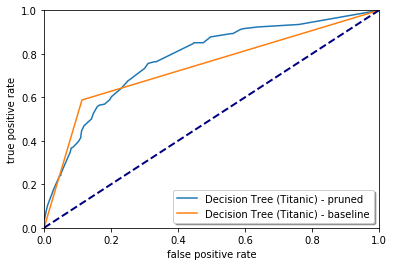

Model Training Time (s):   0.01105
Model Prediction Time (s): 0.00026

roc_auc score: 0.775332334546
accuracy score: 0.800816326531
precision score: 0.551724137931
recall score: 0.36641221374
F1 score: 0.440366972477


In [22]:
#Re-run DT with the best parameters reported in Grid Search
#start_time=time.time()
start_time = timeit.default_timer()

decisiontree1 = DecisionTreeClassifier(max_depth=7, min_samples_split=50)
# Training
decisiontree1.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred = decisiontree1.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

Y_pred_proba = decisiontree1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test,Y_pred_proba)

Y_pred0_proba=decisiontree0.predict_proba(X_test)[:,1]
fpr0, tpr0, thresholds0=metrics.roc_curve(y_test, Y_pred0_proba)

# Plotting and printing
plt.plot(fpr,tpr,label='Decision Tree (Titanic) - pruned')
plt.plot(fpr0,tpr0,label='Decision Tree (Titanic) - baseline')
plt.xlabel ('false positive rate')
plt.ylabel ('true positive rate')
plt.legend(loc='lower right',shadow=True)
lw=2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  
print("roc_auc score: %s" % metrics.roc_auc_score(y_test,Y_pred_proba))
print("accuracy score: %s" % metrics.accuracy_score(y_test,Y_pred))
print("precision score: %s" % metrics.precision_score(y_test,Y_pred))
print("recall score: %s" % metrics.recall_score(y_test,Y_pred))
print("F1 score: %s" % metrics.f1_score(y_test,Y_pred))

In [23]:
#acctrain_decisiontree1 = round(decisiontree1.score(X_train, y_train), 3)
#print('Accuracy score (train set, pruned, no cross validation):', acctrain_decisiontree1)

Accuracy score (train set, pruned, no cross validation): 0.851


In [24]:
acctest_decisiontree1 = round(accuracy_score(Y_pred, y_test), 3)
print('Accuracy score (test set, pruned):', acctest_decisiontree1)

Accuracy score (test set, pruned): 0.801


In [25]:
# cross validation (train set)
start_time=time.time()
scoresDT = cross_val_score(decisiontree1, X_train, y_train, cv = 5, scoring = 'roc_auc', n_jobs=-1)
print('Decision Tree Accuracy Train Set (CV/Mean): ', np.mean(scoresDT))
print("process time total:{:.2f} seconds".format(time.time()-start_time))
print('Decision Tree Accuracy Train Set (CV/SD): ', np.std(scoresDT))
# The cross_val_score returns the accuracy for all the folds

Decision Tree Accuracy Train Set (CV/Mean):  0.814375061526
process time total:1.31 seconds
Decision Tree Accuracy Train Set (CV/SD):  0.00645726302274


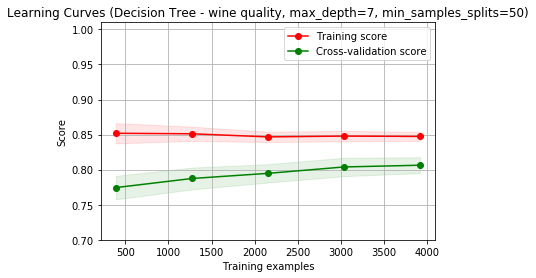

In [45]:
# learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (Decision Tree - wine quality, max_depth=7, min_samples_splits=50)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(max_depth=7, min_samples_split=50)

plot_learning_curve(estimator, title, X,Y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [27]:
print(classification_report(y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       963
          1       0.55      0.37      0.44       262

avg / total       0.78      0.80      0.79      1225



In [28]:
print(classification_report(y_test,Y_pred0))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89       963
          1       0.59      0.59      0.59       262

avg / total       0.82      0.82      0.82      1225



In [30]:
# Neural Networks
# Baseline (no pruning)
start_time = timeit.default_timer()

neuraln0 = MLPClassifier(random_state=1)
neuraln0.fit(X_train, y_train.ravel())
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred0 = neuraln0.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

acctrain_neuraln0 = round(neuraln0.score(X_train, y_train), 3)
print('Accuracy score (train set, baseline - no cross validation):', acctrain_neuraln0)
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  


Accuracy score (train set, baseline - no cross validation): 0.798
Model Training Time (s):   0.24110
Model Prediction Time (s): 0.00026



In [31]:
acctest_neuraln0 = round(accuracy_score(Y_pred0, y_test) , 3)
print('Accuracy score (test set, baseline):', acctest_neuraln0)
auc_neuraln0 = round(roc_auc_score(Y_pred0, y_test),3)
print('Accuracy score (test set, baseline - unpruned):', auc_neuraln0)

Accuracy score (test set, baseline): 0.776
Accuracy score (test set, baseline - unpruned): 0.649


[0.52527710580799813, 0.5, 0.5]
[0.5199678168573082, 0.5, 0.5]


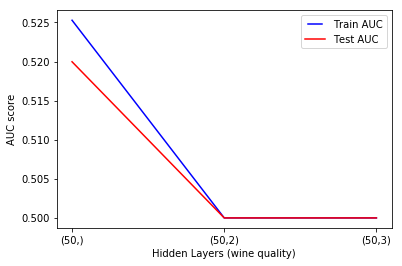

In [32]:
# NN Parameter Tuning - hidden layer:
hidden_layer_sizes =  [(50,), (50,2), (50,3)]
train_results = []
test_results = []
for hidden_layer_sizes in hidden_layer_sizes:
    nn= MLPClassifier( hidden_layer_sizes=hidden_layer_sizes)
    nn.fit(X_train, y_train.ravel())
    train_pred = nn.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = nn.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

print(train_results)
print(test_results)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(["(50,)" ,"(50,2)","(50,3)" ], train_results, 'b', label='Train AUC')
line2, = plt.plot(["(50,)","(50,2)","(50,3)"], test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Hidden Layers (wine quality)')
plt.show()

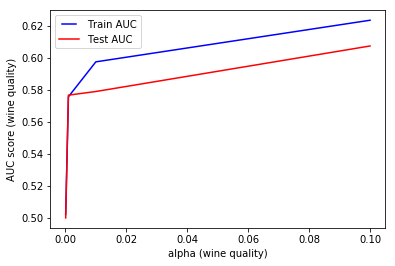

In [50]:
alpha_arr = [0.0001,0.001,0.01,0.1]
train_results = []
test_results = []
for alpha in alpha_arr:
    nn= MLPClassifier( alpha=alpha)
    nn.fit(X_train, y_train)
    train_pred = nn.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = nn.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alpha_arr, train_results, 'b', label='Train AUC')
line2, = plt.plot(alpha_arr, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score (wine quality)')
plt.xlabel('alpha (wine quality)')

plt.show()


In [38]:
start_time=time.time()


MLP = MLPClassifier()
mlp_param_grid = {'hidden_layer_sizes' : [(50,),(80,),(200,)],
                  'solver' : ['lbfgs','adam'],
                  'max_iter':[1000]}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)
gsMLP.fit(X_train,y_train)
MLP_best = gsMLP.best_estimator_

#gsMLP.best_score_

print("process time total:{:.2f} seconds".format(time.time()-start_time))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.3min finished


process time total:149.64 seconds


In [40]:
print("best score: %s" % gsMLP.best_score_)
print("best param: %s" % gsMLP.best_params_)

best score: 0.804791723387
best param: {'alpha': 0.01, 'hidden_layer_sizes': (200,), 'max_iter': 1000, 'solver': 'lbfgs'}


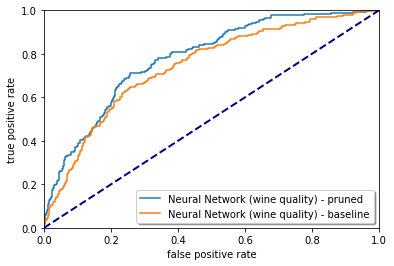

Model Training Time (s):   3.31731
Model Prediction Time (s): 0.00026



In [47]:
#Re-run DT with the best parameters reported in Grid Search

neuraln1 = MLPClassifier(max_iter=1000,solver='lbfgs',hidden_layer_sizes=[50,],random_state=1)

# Training
start_time = timeit.default_timer()

neuraln1.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred = neuraln1.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

Y_pred0_proba=neuraln0.predict_proba(X_test)[:,1]
fpr0, tpr0, thresholds0=metrics.roc_curve(y_test, Y_pred0_proba)

pruned_roc_auc= roc_auc_score(y_test, neuraln1.predict(X_test))
baseline_roc_auc = roc_auc_score(y_test, neuraln0.predict(X_test))
# Plotting and printing

#plt.plot(fpr,tpr,label='Neural Network - pruned(area = %0.4f)'% pruned_roc_auc)
#plt.plot(fpr0,tpr0,label='Neural Network - baseline(area = %0.4f)'% baseline_roc_auc)
plt.plot(fpr,tpr,label='Neural Network (wine quality) - pruned')
plt.plot(fpr0,tpr0,label='Neural Network (wine quality) - baseline')
plt.xlabel ('false positive rate')
plt.ylabel ('true positive rate')
plt.legend(loc='lower right',shadow=True)
lw=2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time)) 
#print("roc_auc score: %s" % metrics.roc_auc_score(y_test,Y_pred_proba))
#print("accuracy score: %s" % metrics.accuracy_score(y_test,Y_pred))
#print("precision score: %s" % metrics.precision_score(y_test,Y_pred))
#print("recall score: %s" % metrics.recall_score(y_test,Y_pred))
#print("F1 score: %s" % metrics.f1_score(y_test,Y_pred))


In [48]:
acctest_neuraln1 = round(accuracy_score(Y_pred, y_test), 3)
print('Accuracy score (test set, pruned):', acctest_neuraln1)
roc_neuraln1 = round(roc_auc_score(Y_pred, y_test),3)
print('ROC score (test set, baseline - unpruned):', roc_neuraln1)

Accuracy score (test set, pruned): 0.804
ROC score (test set, baseline - unpruned): 0.706


In [49]:
# cross validation (train set)
scoresNN = cross_val_score(neuraln1, X_train, y_train, cv = 5, scoring = 'roc_auc', n_jobs=-1)
print('Decision Tree Accuracy Train Set (CV/Mean): ', np.mean(scoresNN))
print('Decision Tree Accuracy Train Set (CV/SD): ', np.std(scoresNN))
# The cross_val_score returns the accuracy for all the folds


Decision Tree Accuracy Train Set (CV/Mean):  0.802470139459
Decision Tree Accuracy Train Set (CV/SD):  0.0177883034269


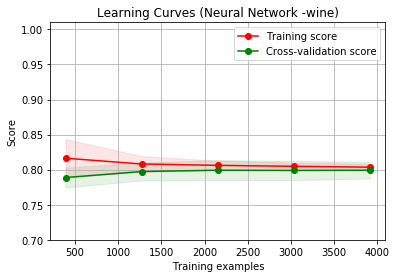

In [46]:
# learning curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (Neural Network -wine)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(max_iter=1000,solver='lbfgs',hidden_layer_sizes=[50,],random_state=1)

plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [51]:
print(classification_report(y_test,Y_pred))
print(classification_report(y_test,Y_pred0))

             precision    recall  f1-score   support

          0       0.83      0.94      0.88       963
          1       0.58      0.30      0.40       262

avg / total       0.78      0.80      0.78      1225

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       963
          1       0.47      0.34      0.39       262

avg / total       0.75      0.78      0.76      1225



In [77]:
# Boosting
# Baseline (no pruning)
start_time = timeit.default_timer()

gbc0 = GradientBoostingClassifier()
gbc0.fit(X_train, y_train.ravel())
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred0 = gbc0.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

acctrain_gbc0 = round(gbc0.score(X_train, y_train) , 3)
print('Accuracy score (train set, baseline - unpruned, no cross validation):', acctrain_gbc0)
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  


Accuracy score (train set, baseline - unpruned, no cross validation): 0.873
Model Training Time (s):   0.18277
Model Prediction Time (s): 0.00026



In [78]:
acctest_gbc0 = round(accuracy_score(Y_pred0, y_test) , 3)
print('Accuracy score (test set, baseline):', acctest_gbc0)
auc_gbc0 = round(roc_auc_score(Y_pred0, y_test),3)
print('Accuracy score (test set, baseline - unpruned):', auc_gbc0)

Accuracy score (test set, baseline): 0.832
Accuracy score (test set, baseline - unpruned): 0.769


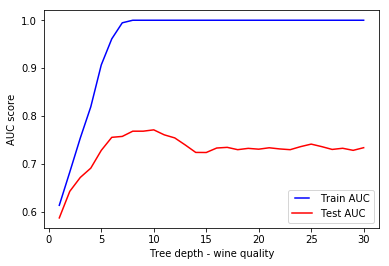

In [57]:
# GBC Parameter Tuning - max depth:
max_depths = np.linspace(1, 30, 30, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    gbc= GradientBoostingClassifier( max_depth=max_depth)
    gbc.fit(X_train, y_train.ravel())
    train_pred = gbc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbc.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth - wine quality')
plt.show()


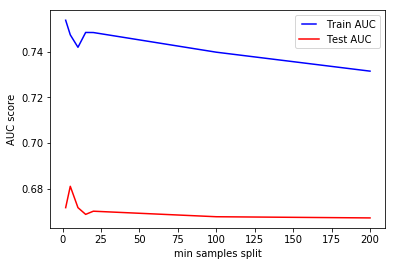

In [98]:
min_samples_splits = (2,5,10,15,20,100,200)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    gbc = GradientBoostingClassifier(min_samples_split=min_samples_split)
    gbc.fit(X_train, y_train.ravel())
    train_pred = gbc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbc.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')

plt.show()

In [79]:
# GBC (some pruning, Grid Search)

#grid search
import time
start_time=time.time()

max_depth_arr = range(1,8,1)
min_samples_split_arr = range(5,40,5)

parameters= [{'max_depth': max_depth_arr}]


gs_gbc=GridSearchCV(estimator=gbc0,param_grid=parameters,scoring = 'roc_auc', n_jobs=-1,cv=5)
gs_gbc.fit(X_train,y_train)

print("process time total:{:.2f} seconds".format(time.time()-start_time))


process time total:5.08 seconds


In [80]:
print("best score: %s" % gs_gbc.best_score_)
print("best param: %s" % gs_gbc.best_params_)


best score: 0.896848985897
best param: {'max_depth': 7}


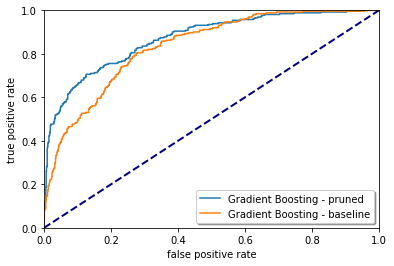

Model Training Time (s):   0.74610
Model Prediction Time (s): 0.00026



In [81]:
#Re-run GBC with the best parameters reported in Grid Search
start_time = timeit.default_timer()
#gbc1=GradientBoostingClassifier(max_depth=6, learning_rate=0.01, min_samples_split=14, n_estimators=200)
gbc1=GradientBoostingClassifier(max_depth=7)
# Training
#gbc1=GradientBoostingClassifier(max_depth=6, learning_rate=0.01, min_samples_split=14, n_estimators=200)
gbc1.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred =gbc1.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time


pruned_roc_auc= roc_auc_score(y_test, gbc1.predict(X_test))
Y_pred_proba = gbc1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test,Y_pred_proba)

baseline_roc_auc = roc_auc_score(y_test, gbc0.predict(X_test))
Y_pred0_proba=gbc0.predict_proba(X_test)[:,1]
fpr0, tpr0, thresholds0=metrics.roc_curve(y_test, Y_pred0_proba)

# Plotting and printing
#plt.plot(fpr,tpr,label='Gradient Boosting - pruned(area = %0.4f)'% pruned_roc_auc)
#plt.plot(fpr0,tpr0,label='Gradient Boosting - baseline(area = %0.4f)'% baseline_roc_auc)
plt.plot(fpr,tpr,label='Gradient Boosting - pruned')
plt.plot(fpr0,tpr0,label='Gradient Boosting - baseline')
plt.xlabel ('false positive rate')
plt.ylabel ('true positive rate')
plt.legend(loc='lower right',shadow=True)
lw=2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  
#print("roc_auc score: %s" % metrics.roc_auc_score(y_test,Y_pred_proba))
#print("accuracy score: %s" % metrics.accuracy_score(y_test,Y_pred))
#print("precision score: %s" % metrics.precision_score(y_test,Y_pred))
#print("recall score: %s" % metrics.recall_score(y_test,Y_pred))
#print("F1 score: %s" % metrics.f1_score(y_test,Y_pred))

In [82]:
acctest_gbc1 = round(accuracy_score(Y_pred, y_test) , 3)
print('Accuracy score (test set, pruned):', acctest_gbc1)
roc_gbc1 = round(roc_auc_score(Y_pred, y_test),3)
print('ROC score (test set, baseline - unpruned):', roc_gbc1)

Accuracy score (test set, pruned): 0.863
ROC score (test set, baseline - unpruned): 0.809


In [83]:
# cross validation (train set)
scoresGBC = cross_val_score(gbc1, X_train, y_train, cv = 5, scoring = 'roc_auc', n_jobs=-1)
print('GBC Accuracy Train Set (CV/Mean): ', np.mean(scoresGBC))
print('GBC Accuracy Train Set (CV/SD): ', np.std(scoresGBC))
# The cross_val_score returns the accuracy for all the folds


GBC Accuracy Train Set (CV/Mean):  0.898319155045
GBC Accuracy Train Set (CV/SD):  0.00638453279463


In [84]:
print(classification_report(y_test,Y_pred))
print(classification_report(y_test,Y_pred0))


             precision    recall  f1-score   support

          0       0.89      0.94      0.92       963
          1       0.73      0.57      0.64       262

avg / total       0.86      0.86      0.86      1225

             precision    recall  f1-score   support

          0       0.85      0.95      0.90       963
          1       0.69      0.39      0.50       262

avg / total       0.82      0.83      0.81      1225



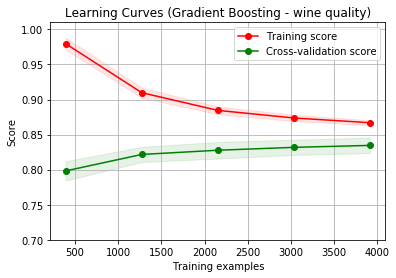

In [85]:
# learning curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (Gradient Boosting - wine quality)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier(max_depth=7)

plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [28]:
# SVM
#svc=SVC(C=30, gamma=0.01)
# Baseline (no pruning)
#from sklearn.svm import SVC, LinearSVC
start_time = timeit.default_timer()

from sklearn.svm import SVC
svc0 = SVC()
svc0.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()

Y_pred0 = svc0.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

acctrain_svc0 = round(svc0.score(X_train, y_train) ,3)
print('Accuracy score (train set, baseline - unpruned, no cross validation):', acctrain_svc0)
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  

Accuracy score (train set, baseline - unpruned, no cross validation): 0.907
Model Training Time (s):   0.95493
Model Prediction Time (s): 0.00074



In [88]:
acctest_svc0 = round(accuracy_score(Y_pred0, y_test) , 3)
print('Accuracy score (test set, baseline - unpruned):', acctest_svc0)
auc_svc0 = round(roc_auc_score(Y_pred0, y_test),3)
print('Accuracy score (test set, baseline - unpruned):', auc_svc0)

Accuracy score (test set, baseline - unpruned): 0.807
Accuracy score (test set, baseline - unpruned): 0.715


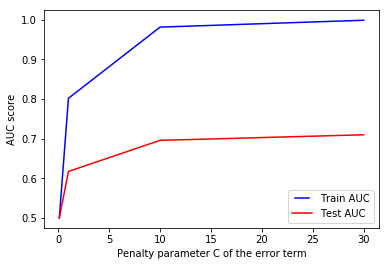

In [89]:
# SVM Parameter Tuning - C:
C_arr=[0.1,1,10,30]
train_results = []
test_results = []
for C in C_arr:
   svc= SVC(C=C)
   svc.fit(X_train, y_train)
   train_pred = svc.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = svc.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(C_arr, train_results, 'b', label='Train AUC')
line2, = plt.plot(C_arr, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Penalty parameter C of the error term - wine quality')
plt.show()


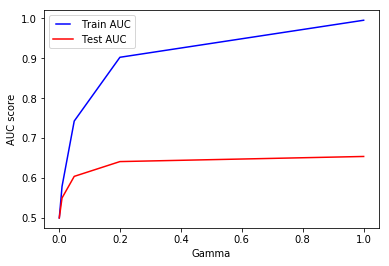

In [109]:
# SVM Parameter Tuning - gamma:
gamma_arr=[0.001,0.01,0.05,0.2,1]
train_results = []
test_results = []
for gamma in gamma_arr:
   svc= SVC(gamma=gamma)
   svc.fit(X_train, y_train)
   train_pred = svc.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = svc.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gamma_arr, train_results, 'b', label='Train AUC')
line2, = plt.plot(gamma_arr, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Gamma')
plt.show()

In [ ]:
#SVM Parameter Tuning - kernel:
kernel_arr =  ['linear', 'rbf']
train_results = []
test_results = []
for kernel in kernel_arr:
    svc=SVC(kernel=kernel)
    svc.fit(X_train, y_train.ravel())
    train_pred = nn.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = svc.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

print(train_results)
print(test_results)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(['linear', 'rbf' ], train_results, 'b', label='Train AUC')
line2, = plt.plot(['linear', 'rbf'], test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Kernel')
plt.show()

In [90]:
# SVM (some pruning, Grid Search)

#grid search
import time
start_time=time.time()

C_arr = [0.1,1,10,30]
gamma_arr=[0.001,0.01,0.05,0.2,1]
kernel_arr=['linear', 'rbf']

parameters= [{'C': C_arr, 'gamma':gamma_arr, 'kernel':kernel_arr}]


gs_svc=GridSearchCV(estimator=svc0,param_grid=parameters,scoring = 'roc_auc', n_jobs=-1,cv=5)
gs_svc.fit(X_train,y_train)

print("process time total:{:.2f} seconds".format(time.time()-start_time))


process time total:1796.54 seconds


In [91]:
print("best score: %s" % gs_svc.best_score_)
print("best param: %s" % gs_svc.best_params_)

best score: 0.792394968222
best param: {'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}


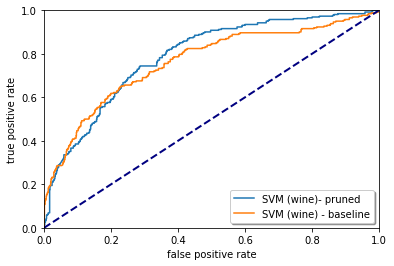

Model Training Time (s):   4.69918
Model Prediction Time (s): 0.00074



In [29]:
#Re-run SVM with the best parameters reported in Grid Search
start_time = timeit.default_timer()
svc1=SVC(C=30, gamma=0.01, kernel='rbf')
svc0=SVC()

#trick sklearn:
svc1.probability = True
svc0.probability= True

# Training
svc1.fit(X_train, y_train)
         
end_time = timeit.default_timer()
training_time = end_time - start_time
         
start_time = timeit.default_timer()         
Y_pred =svc1.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time
         
svc0.fit(X_train, y_train)
#pruned_roc_auc= roc_auc_score(y_test, svc1.predict(X_test))
Y_pred_proba = svc1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test,Y_pred_proba)

#baseline_roc_auc = roc_auc_score(y_test, svc0.predict(X_test))
Y_pred0_proba=svc0.predict_proba(X_test)[:,1]
fpr0, tpr0, thresholds0=metrics.roc_curve(y_test, Y_pred0_proba)

# Plotting and printing

plt.plot(fpr,tpr,label='SVM (wine)- pruned')
plt.plot(fpr0,tpr0,label='SVM (wine) - baseline')
plt.xlabel ('false positive rate')
plt.ylabel ('true positive rate')
plt.legend(loc='lower right',shadow=True)
lw=2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  
#print("roc_auc score: %s" % metrics.roc_auc_score(y_test,Y_pred_proba))
#print("accuracy score: %s" % metrics.accuracy_score(y_test,Y_pred))
#print("precision score: %s" % metrics.precision_score(y_test,Y_pred))
#print("recall score: %s" % metrics.recall_score(y_test,Y_pred))
#print("F1 score: %s" % metrics.f1_score(y_test,Y_pred))

In [94]:
acctest_svc1 = round(accuracy_score(Y_pred, y_test) , 3)
print('Accuracy score (test set, pruned):', acctest_svc1)
roc_svc1 = round(roc_auc_score(Y_pred, y_test),3)
print('ROC score (test set, baseline - unpruned):', roc_svc1)

Accuracy score (test set, pruned): 0.789
ROC score (test set, baseline - unpruned): 0.677


In [96]:
# cross validation (train set)
scoresSVM = cross_val_score(svc1, X_train, y_train, cv = 5, scoring = 'roc_auc', n_jobs=-1)
print('SVM Accuracy Train Set (CV/Mean): ', np.mean(scoresSVM))
print('SVM Accuracy Train Set (CV/SD): ', np.std(scoresSVM))
# The cross_val_score returns the accuracy for all the folds


SVM Accuracy Train Set (CV/Mean):  0.792400068362
SVM Accuracy Train Set (CV/SD):  0.0115318788259


In [97]:
print(classification_report(y_test,Y_pred))
print(classification_report(y_test,Y_pred0))


             precision    recall  f1-score   support

          0       0.84      0.90      0.87       963
          1       0.51      0.39      0.44       262

avg / total       0.77      0.79      0.78      1225

             precision    recall  f1-score   support

          0       0.83      0.95      0.89       963
          1       0.60      0.29      0.39       262

avg / total       0.78      0.81      0.78      1225



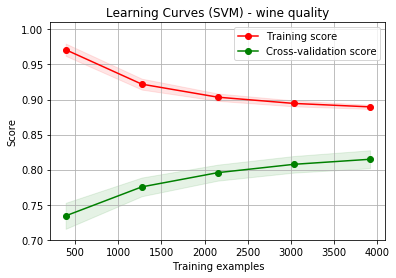

In [30]:
# learning curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (SVM) - wine quality"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC(C=30, gamma=0.01, kernel='rbf')
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [31]:
# KNN
# Baseline (no pruning)
start_time = timeit.default_timer()

knn0=KNeighborsClassifier()
knn0.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred0 = knn0.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

acctrain_knn0 = round(knn0.score(X_train, y_train), 3)
print('Accuracy score (train set, baseline - unpruned, no cross validation):', acctrain_knn0)
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))  


Accuracy score (train set, baseline - unpruned, no cross validation): 0.857
Model Training Time (s):   0.01709
Model Prediction Time (s): 0.00074



In [32]:
acctest_knn0 = round(accuracy_score(Y_pred0, y_test) , 3)
print('Accuracy score (test set, baseline - unpruned):', acctest_knn0)
auc_knn0 = round(roc_auc_score(Y_pred0, y_test),3)
print('Accuracy score (test set, baseline - unpruned):', auc_knn0)

Accuracy score (test set, baseline - unpruned): 0.786
Accuracy score (test set, baseline - unpruned): 0.667


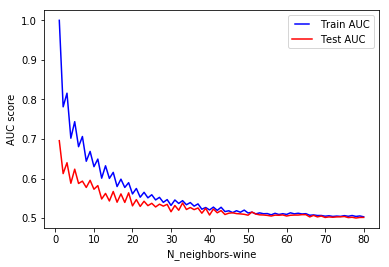

In [44]:
# KNN Parameter Tuning - n_neighbors:
neighbor_arr = np.linspace(1, 80, 80, endpoint=True).astype('int')
train_results = []
test_results = []
for n_neighbors in neighbor_arr:
    knn= KNeighborsClassifier( n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = knn.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbor_arr, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbor_arr, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('N_neighbors-wine')
plt.show()



In [35]:
# KNN (some pruning, Grid Search)
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import time
start_time=time.time()

neighbor_arr = np.linspace(1, 40, 40, endpoint=True).astype('int')

parameters= [{'n_neighbors': neighbor_arr}]

gs_knn=GridSearchCV(estimator=knn0,param_grid=parameters,scoring = 'roc_auc', n_jobs=-1,cv=5)
gs_knn.fit(X_train,y_train)

print("process time total:{:.2f} seconds".format(time.time()-start_time))


process time total:7.31 seconds


In [36]:
print("best score: %s" % gs_knn.best_score_)
print("best param: %s" % gs_knn.best_params_)

best score: 0.730544673387
best param: {'n_neighbors': 6}


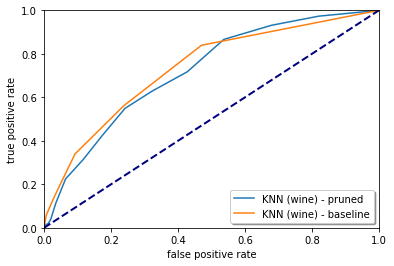

Model Training Time (s):   0.00528
Model Prediction Time (s): 0.00074



In [42]:
#Re-run KNN with the best parameters reported in Grid Search

start_time = timeit.default_timer()

knn1=KNeighborsClassifier(n_neighbors=18)
# Training
knn1.fit(X_train, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time

start_time = timeit.default_timer()
Y_pred =knn1.predict(X_test)
end_time = timeit.default_timer()
predict_time = end_time - start_time

pruned_roc_auc= roc_auc_score(y_test, knn1.predict(X_test))
Y_pred_proba = knn1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test,Y_pred_proba)

baseline_roc_auc = roc_auc_score(y_test, knn0.predict(X_test))
Y_pred0_proba=knn0.predict_proba(X_test)[:,1]
fpr0, tpr0, thresholds0=metrics.roc_curve(y_test, Y_pred0_proba)

# Plotting and printing
plt.plot(fpr,tpr,label='KNN (wine) - pruned')
plt.plot(fpr0,tpr0,label='KNN (wine) - baseline')
plt.xlabel ('false positive rate')
plt.ylabel ('true positive rate')
plt.legend(loc='lower right',shadow=True)
lw=2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
print("Model Training Time (s):   "+"{:.5f}".format(training_time))
print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time)) 
#print("roc_auc score: %s" % metrics.roc_auc_score(y_test,Y_pred_proba))
#print("accuracy score: %s" % metrics.accuracy_score(y_test,Y_pred))
#print("precision score: %s" % metrics.precision_score(y_test,Y_pred))
#print("recall score: %s" % metrics.recall_score(y_test,Y_pred))
#print("F1 score: %s" % metrics.f1_score(y_test,Y_pred))

In [38]:
acctest_knn1 = round(accuracy_score(Y_pred, y_test) , 3)
print('Accuracy score (test set, pruned):', acctest_knn1)
roc_knn1 = round(roc_auc_score(Y_pred, y_test),3)
print('ROC score (test set, baseline - unpruned):', roc_knn1)

Accuracy score (test set, pruned): 0.783
ROC score (test set, baseline - unpruned): 0.634


In [39]:
# cross validation (train set)
scoresKNN = cross_val_score(knn1, X_train, y_train, cv = 5, scoring = 'roc_auc', n_jobs=-1)
print('KNN Accuracy Train Set (CV/Mean): ', np.mean(scoresKNN))
print('KNN Accuracy Train Set (CV/SD): ', np.std(scoresKNN))
# The cross_val_score returns the accuracy for all the folds

KNN Accuracy Train Set (CV/Mean):  0.708159522833
KNN Accuracy Train Set (CV/SD):  0.0242455550031


In [40]:
print(classification_report(y_test,Y_pred))
print(classification_report(y_test,Y_pred0))


             precision    recall  f1-score   support

          0       0.80      0.96      0.87       963
          1       0.47      0.11      0.18       262

avg / total       0.73      0.78      0.73      1225

             precision    recall  f1-score   support

          0       0.83      0.91      0.87       963
          1       0.50      0.34      0.40       262

avg / total       0.76      0.79      0.77      1225



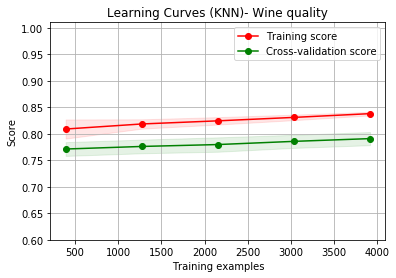

In [47]:
# learning curve

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (KNN)- Wine quality"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=6)
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

plt.show()

This model did not perform nearly as well as logistic regression. This indicates that the predictors I chose for this data do not cluster very well. Thus, KNeighborsClassifier is probably not the best sklearn model to choose.
https://medium.com/@andrewadelson/testing-different-models-for-the-titanic-dataset-be5f725b7ec0